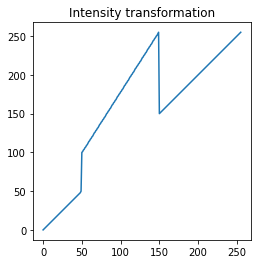

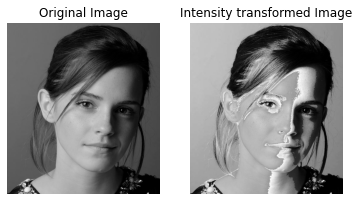

In [5]:
#Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)

fig,ax= plt.subplots()
ax.plot(t)
ax.set_title("Intensity transformation")
ax.set_aspect('equal')
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Intensity transformed Image")
plt.show()

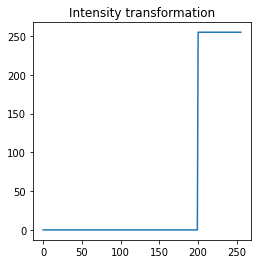

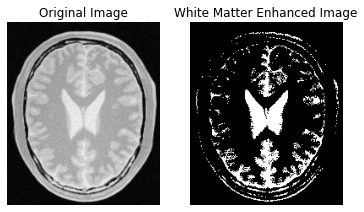

In [4]:
#Question 2 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.zeros(200)
t2 = 255*np.ones(56)
t = np.concatenate((t1,t2),axis=0).astype(np.uint8)

fig,ax= plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
ax.set_title("Intensity transformation")
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("White Matter Enhanced Image")
plt.show()

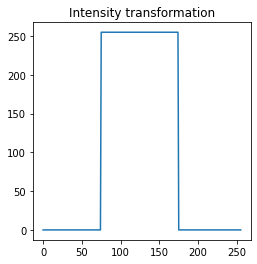

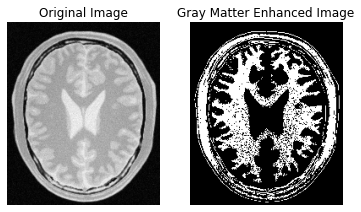

In [7]:
#Question 2 (b)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.zeros(75)
t2 = 255*np.ones(100)
t3 = np.zeros(81)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax= plt.subplots()
ax.plot(t)
ax.set_title("Intensity transformation")
ax.set_aspect('equal')
assert len(t)==256
g = cv.LUT(f,t)

fig, ax = plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title("Gray Matter Enhanced Image")
plt.show()

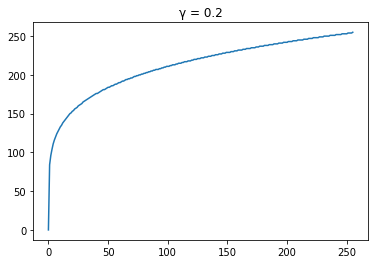

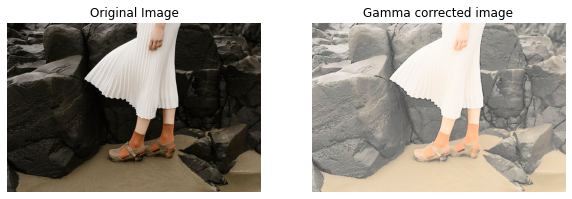

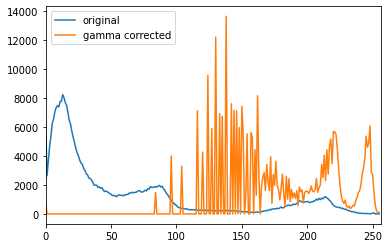

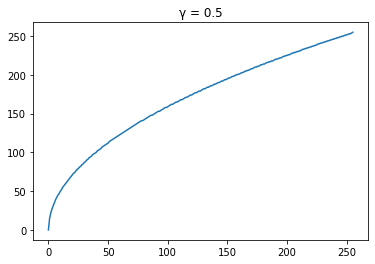

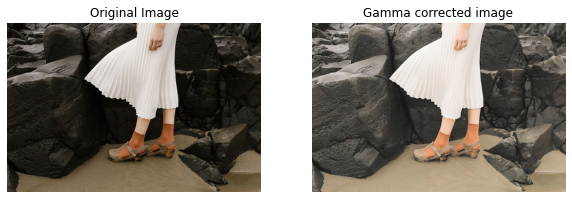

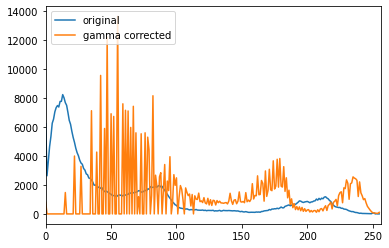

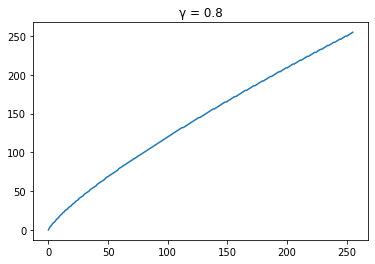

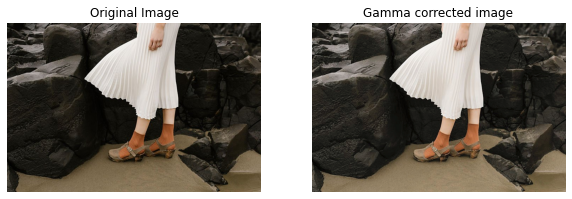

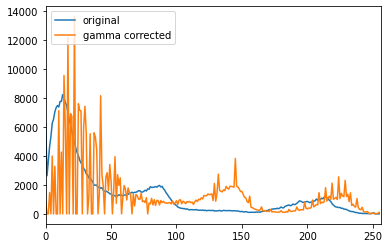

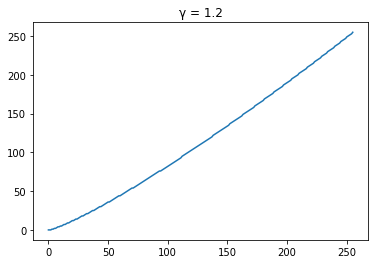

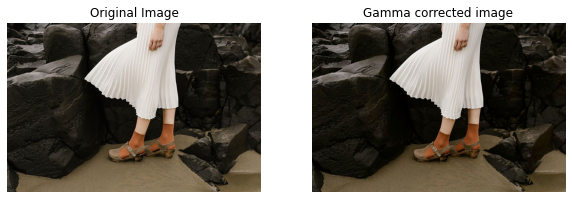

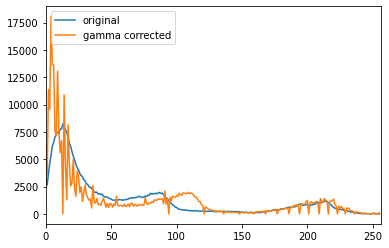

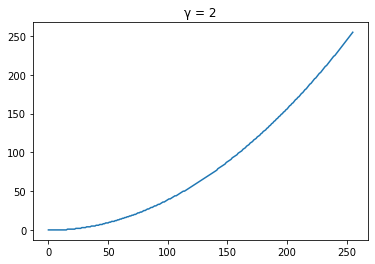

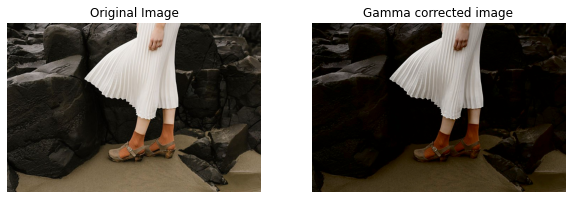

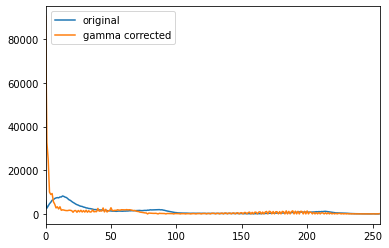

In [9]:
#Question 3 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("highlights_and_shadows.jpg")
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))

gamma = [0.2, 0.5, 0.8, 1.2, 2]
for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(L,t)

    fig, ax = plt.subplots()
    ax.set_title("\u03B3 = "+ str(i))
    ax.plot(t)

    fig, ax = plt.subplots(1,2, figsize = (10,10))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    corrected_img = cv.merge([g, a, b])
    ax[1].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB))
    ax[1].set_title('Gamma corrected image')
    ax[1].axis('off')
    plt.show()

    #Question 3 (b)
    hist1 = cv.calcHist([img],[0],None,[256],[0,256])
    plt.plot(hist1)
    plt.xlim([0,256])
    hist2 = cv.calcHist([corrected_img],[0],None,[256],[0,256])
    plt.plot(hist2)
    plt.xlim([0,256])
    plt.legend(('original','gamma corrected'),loc='upper left')
    plt.show()


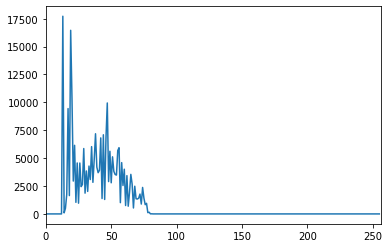

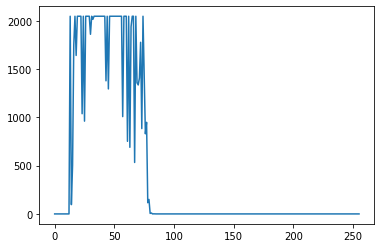

In [23]:
#Question 4
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("shells.png", cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

rows = img.shape[0]
cols = img.shape[1]
arr1 = np.zeros((256,), dtype=np.float16)
arr2 = np.zeros((256,), dtype=np.float16)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        arr1[g] += 1

for i in range(256):
    for j in range(i+1):
        arr2[i] += arr1[j]*(1/(rows*cols))
    arr2[i] = np.round(arr2[i],0)

arr2 = arr2.astype(np.uint8)

for i in range(rows):
    for j in range(cols):
        g = img[i,j]
        img[i,j] = arr2[g]

fig, ax = plt.subplots()
plt.plot(arr1)
#ax[1].plot(arr2)
#plt.imshow(img)
plt.show() 

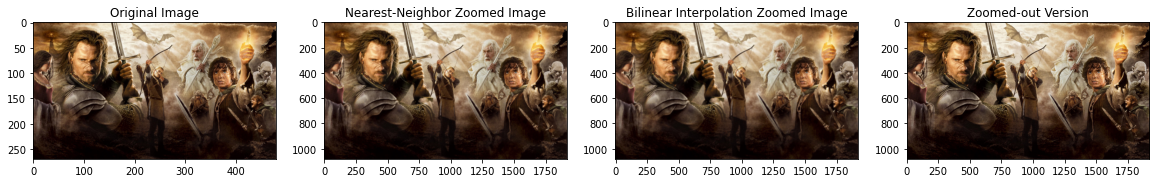

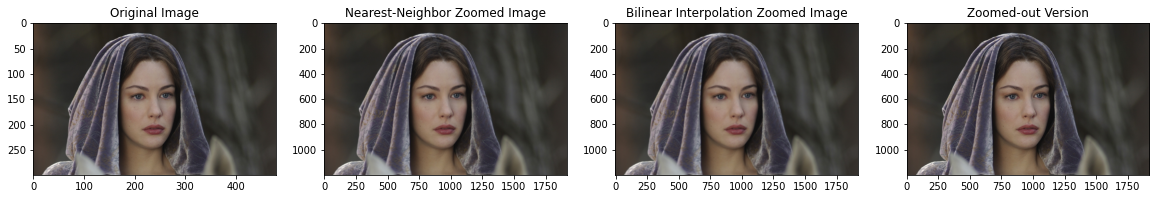

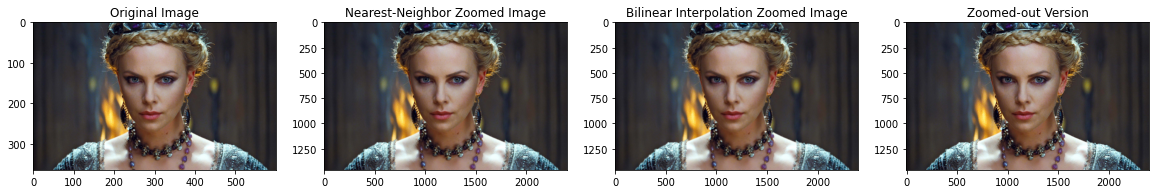

In [15]:
#Question 5 (a)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
originals = ["im01small.png", "im02small.png", "im03small.png"]
zoomed_outs = ["im01.png", "im02.png", "im03.png"]
for i in range(3):
    img = cv.imread(originals[i])
    img1 = cv.imread(zoomed_outs[i])

    near_img = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)
    bilinear_img = cv.resize(img, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)

    fig, ax = plt.subplots(1,4, figsize=(20,20))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(near_img,cv.COLOR_BGR2RGB))
    ax[1].set_title("Nearest-Neighbor Zoomed Image")
    ax[2].imshow(cv.cvtColor(bilinear_img,cv.COLOR_BGR2RGB))
    ax[2].set_title("Bilinear Interpolation Zoomed Image")   #Question 5 (b)
    ax[3].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
    ax[3].set_title("Zoomed-out Version")
    plt.show()

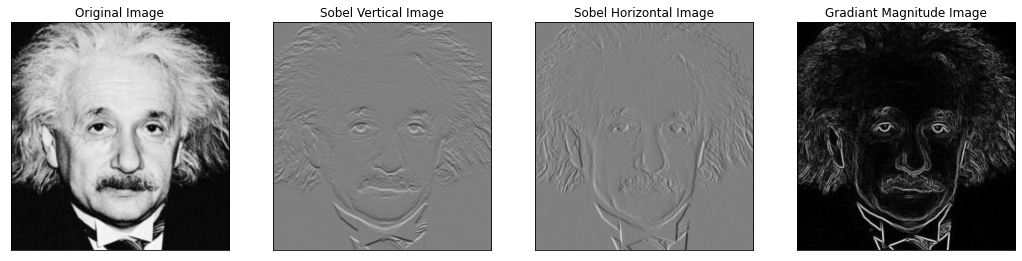

In [49]:
#Question 6 (a)
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
sobel_v = np.array([(-1,-2,-1), (0,0,0), (1,2,1)], dtype='float')
sobel_h = np.array([(-1,0,1), (-2,0,2), (-1,0,1)], dtype='float')

imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)
grad_mag = np.sqrt(imv**2+imh**2)

fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradiant Magnitude Image')
axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()

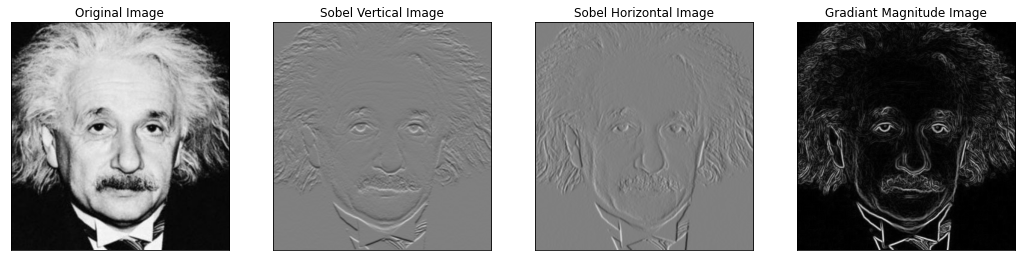

In [51]:
#Question 6 (b)
import cv2 as cv
import numpy as np

img = cv.imread("einstein.png")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(float)

x_edge = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
y_edge = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
edge = np.sqrt(x_edge**2+y_edge**2)

fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(y_edge, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(x_edge, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(edge, cmap='gray')
axes[3].set_title('Gradiant Magnitude Image')
axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()

In [ ]:
#Question 6 (c)

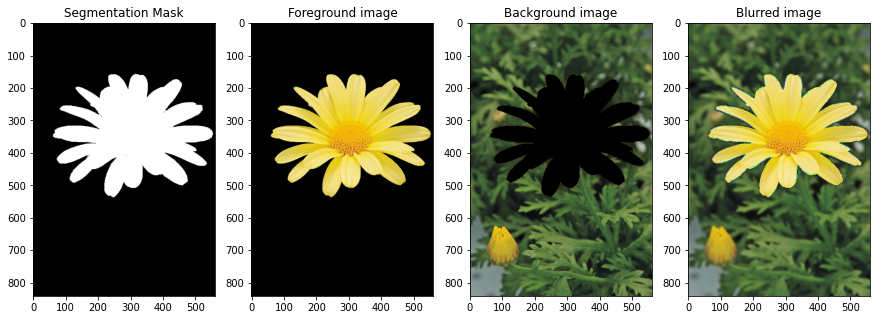

In [34]:
#Question 7 (a)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("daisy.jpg")
mask = np.zeros(img.shape[:2], np.uint8)

background_model = np.zeros((1,65), np.float64)
foreground_model = np.zeros((1,65), np.float64)
rectangle = (50,50,505,505)

cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask1 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

img1 = img*mask1[:,:,np.newaxis]
fig, ax = plt.subplots(1,4, figsize = (15,15))
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground image")

cv.grabCut(img, mask, rectangle, background_model,foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==3)|(mask==1),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Background image")

#Question 7 (b)
blurred_img = img1 + cv.GaussianBlur(img2,(15,15),0)
ax[3].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
ax[3].set_title("Blurred image")
plt.show()

Question 7 (c)